In [1]:
### Import
import yfinance as yf
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
coins_list = [
    "ABNB", "V", "AMD", "CSCO", "HNI", "ORI", 
    "SPR", "XOM", "CB", "LOW", "MDLZ", "GRWG", 
    "BIIB", "ADBE", "CRSR", "INTC", "JNJ", 
    "JPM", "LAZ", "NVDA"
]
ohlc = yf.download(coins_list, period="max")
#print(ohlc.keys())
price_matrix = ohlc["Adj Close"]

market_prices = yf.download("SPY", period="max")["Adj Close"]
#price_matrix.tail()
#price_matrix.info()

mcaps = {}
for coin in coins_list:
    stock = yf.Ticker(coin)
    mcaps[coin] = stock.info["marketCap"]
print(mcaps)

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed
{'ABNB': 87729258496, 'V': 483027025920, 'AMD': 110775648256, 'CSCO': 188394356736, 'HNI': 1467246464, 'ORI': 5927708672, 'SPR': 4124596480, 'XOM': 175978921984, 'CB': 68513603584, 'LOW': 117905170432, 'MDLZ': 83235315712, 'GRWG': 2270204416, 'BIIB': 37527973888, 'ADBE': 239317417984, 'CRSR': 3342363904, 'INTC': 200125825024, 'JNJ': 410939490304, 'JPM': 382457643008, 'LAZ': 4423422976, 'NVDA': 324739792896}


In [3]:
### Covariance
import pypfopt
from pypfopt import (
    EfficientFrontier, HRPOpt,  objective_functions, 
    CLA, risk_models, expected_returns, plotting
)
    

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

#Test avec les différent join pour les ticker soù les dimensions de prix ne matchent pas
# min_periods dans la covar pour enlever si il n'y a pas assez de data
#price_matrix = pd.concat([tickers[coin]["price"].rename(coin) for coin in coins_list], axis=1, join='inner')
#price_matrix.cov()
#price_matrix.reset_index(drop=True, inplace=True)
# pour rajouter les date au dataframe de prix
#date_price_matrix = pd.concat([tickers[coin]["date"], price_matrix], axis=1, join='inner')
#df = date_price_matrix
df = price_matrix
tickers = price_matrix
#print(price_matrix)

                  ABNB        ADBE        AMD        BIIB          CB  \
Date                                                                    
1962-01-02         NaN         NaN        NaN         NaN         NaN   
1962-01-03         NaN         NaN        NaN         NaN         NaN   
1962-01-04         NaN         NaN        NaN         NaN         NaN   
1962-01-05         NaN         NaN        NaN         NaN         NaN   
1962-01-08         NaN         NaN        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2020-12-23  158.009995  496.910004  91.550003  251.199997  151.059998   
2020-12-24  154.839996  499.859985  91.809998  248.889999  150.830002   
2020-12-28  149.000000  498.950012  91.599998  244.149994  151.880005   
2020-12-29  150.000000  502.109985  90.620003  243.460007  150.899994   
2020-12-30  146.839996  498.869995  92.010002  243.875000  151.789993   

                 CRSR       CSCO       GRWG       

<class 'numpy.ndarray'>
['ABNB', 'V', 'AMD', 'CSCO', 'HNI', 'ORI', 'SPR', 'XOM', 'CB', 'LOW', 'MDLZ', 'GRWG', 'BIIB', 'NVDA', 'ADBE', 'CRSR', 'INTC', 'JNJ', 'JPM', 'LAZ']
OrderedDict([('ABNB', 0.19515), ('ADBE', 0.00429), ('AMD', 0.0), ('BIIB', 0.01529), ('CB', 0.034), ('CRSR', 0.17887), ('CSCO', 0.01823), ('GRWG', 0.09886), ('HNI', 0.00557), ('INTC', 0.006), ('JNJ', 0.05385), ('JPM', 0.0), ('LAZ', 0.03187), ('LOW', 0.01478), ('MDLZ', 0.11679), ('NVDA', 0.01104), ('ORI', 0.03037), ('SPR', 0.04426), ('V', 0.09409), ('XOM', 0.04668)])
Expected annual return: 23.9%
Annual volatility: 6.8%
Sharpe Ratio: 3.38
Discrete allocation: {'ABNB': 25, 'BIIB': 1, 'CB': 5, 'CRSR': 87, 'CSCO': 8, 'GRWG': 49, 'HNI': 3, 'INTC': 3, 'JNJ': 7, 'LAZ': 15, 'LOW': 2, 'MDLZ': 39, 'ORI': 30, 'SPR': 23, 'V': 9, 'XOM': 22}
Funds remaining: $11.91


/home/remi/.virtualenvs/data-acc-msZwibCE/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


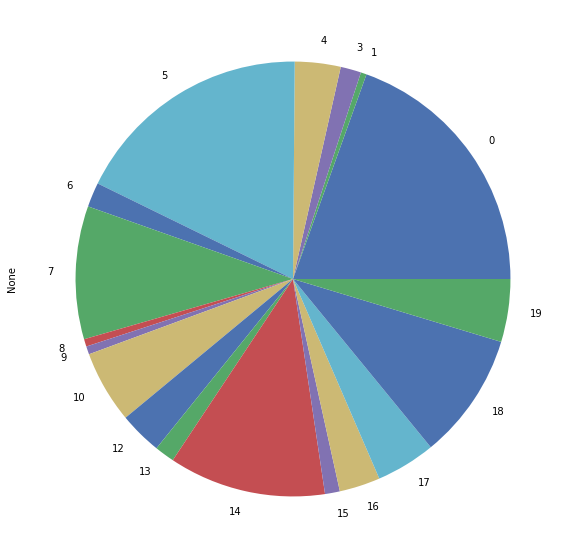

In [7]:
### NORMAL EMA/MEAN HISTORICAL VALUE

#mu = expected_returns.mean_historical_return(df)
#mu = expected_returns.ema_historical_return(df)
mu = expected_returns.capm_return(df)
#mu = expected_returns.returns_from_prices(df)
#mu = expected_returns.prices_from_returns(df)

#S = risk_models.sample_cov(df)
#S = risk_models.semicovariance(df)
#S = risk_models.exp_cov(df)
#S = risk_models.min_cov_determinant(df)
#S = risk_models.CovarianceShrinkage(df.cov(min_periods=15))
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf')
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')
S = risk_models.risk_matrix(prices=df, method='oracle_approximating')

#mu.plot.barh(figsize=(10,5))
#plotting.plot_covariance(S, plot_correlation=True)



# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(tickers)] * len(tickers))

print("==================================")

coins_list = [
    "ABNB", "V", "AMD", "CSCO", "HNI", "ORI", 
    "SPR", "XOM", "CB", "LOW", "MDLZ", "GRWG", 
    "BIIB", "NVDA", "ADBE", "CRSR", "INTC", "JNJ", 
    "JPM", "LAZ"
]

initial_weights = np.array([
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])
print(type(initial_weights))
print(coins_list)
print("==================================")
gamma = 0.05

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=gamma)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

ef.min_volatility()
#ef.max_sharpe()
#ef.max_quadratic_utility()
#ef.min_efficient_risk(0.5)
#ef.min_efficient_return(0.5)


cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate=0.01) # 1% US Bond rate

pd.Series([abs(i) for i in cleaned_weights.values()]).plot.pie(figsize=(10,10))

capital = 19500
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=capital, short_ratio=0.3)

allocation, leftover = da.lp_portfolio()
#allocation, leftover = da.greedy_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

#pd.Series(cleaned_weights).plot.pie(figsize=(10,10))

ef: <pypfopt.hierarchical_portfolio.HRPOpt object at 0x7f5f1f683400>
cleaned weight: OrderedDict([('ABNB', 0.08494), ('ADBE', 0.00068), ('AMD', 0.06513), ('BIIB', 0.00059), ('CB', 0.00119), ('CRSR', 0.09545), ('CSCO', 0.04723), ('GRWG', 0.14294), ('HNI', 0.05801), ('INTC', 0.0328), ('JNJ', 0.00173), ('JPM', 0.00853), ('LAZ', 0.16548), ('LOW', 0.00274), ('MDLZ', 0.02655), ('NVDA', 0.00069), ('ORI', 0.24002), ('SPR', 0.0127), ('V', 0.00083), ('XOM', 0.01175)])
Expected annual return: 686621.3%
Annual volatility: 10423.1%
Sharpe Ratio: 65.87
Discrete allocation: {'ABNB': 11, 'AMD': 14, 'CRSR': 51, 'CSCO': 21, 'GRWG': 67, 'HNI': 33, 'INTC': 13, 'JPM': 1, 'LAZ': 77, 'LOW': 1, 'MDLZ': 9, 'ORI': 240, 'SPR': 7, 'XOM': 6}
Funds remaining: $4.10


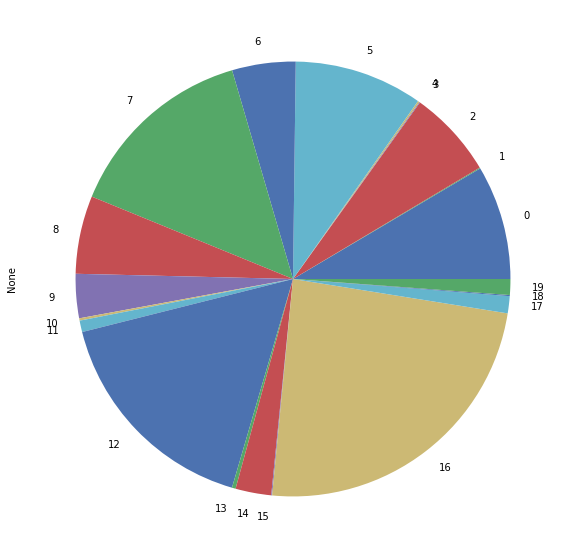

In [9]:
### HRPOPT TECHNIQUE

# En HRP on ne fait pas d'estimation des perfs 
mu = df

#S = risk_models.sample_cov(df)
#S = risk_models.semicovariance(df)
#S = risk_models.exp_cov(df)
#S = risk_models.min_cov_determinant(df)
#S = risk_models.CovarianceShrinkage(df.cov(min_periods=15))
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf')
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')
S = risk_models.risk_matrix(prices=df, method='oracle_approximating')
"""
risk_models_list = {
    'sample_cov': risk_models.sample_cov(df),
    'semi_cov': risk_models.semicovariance(df),
    'exp_cov': risk_models.exp_cov(df),
    'min_cov_det': risk_models.min_cov_determinant(df),
    'cov_shrink': risk_models.CovarianceShrinkage(df.cov(min_periods=100)),
    'ledoit_wolf': risk_models.risk_matrix(prices=df, method='ledoit_wolf'),
    'ld_wolf_single': risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor'),
    'oracle_approx': risk_models.risk_matrix(prices=df, method='oracle_approximating'),
}

risk_models_list = {
    'sample_cov': HRPOpt(mu, risk_models.sample_cov(df)),
    'semi_cov': HRPOpt(mu,risk_models.semicovariance(df)),
    'exp_cov': HRPOpt(mu, risk_models.exp_cov(df)),
    'min_cov_det': HRPOpt(mu, risk_models.min_cov_determinant(df)),
    'cov_shrink': HRPOpt(mu, risk_models.CovarianceShrinkage(df.cov(min_periods=100))),
    'ledoit_wolf': HRPOpt(mu, risk_models.risk_matrix(prices=df, method='ledoit_wolf')),
    'ld_wolf_single': HRPOpt(mu, risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')),
    'oracle_approx': HRPOpt(mu, risk_models.risk_matrix(prices=df, method='oracle_approximating')),
}
"""
capital = 19500
risk_free_rate = 0.01

#mu.plot.barh(figsize=(10,5))
#plotting.plot_covariance(S, plot_correlation=True)

ef = HRPOpt(mu, S)

#import scipy.cluster.hierarchy as sch
#print(sch._LINKAGE_METHODS)
raw_weights = ef.optimize('single')

print(f"ef: {ef}")
#print(f"raw_weights: {raw_weights}")
cleaned_weights = ef.clean_weights()
print(f"cleaned weight: {cleaned_weights}")

ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

pd.Series([abs(i) for i in cleaned_weights.values()]).plot.pie(figsize=(10,10), normalize=True)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=capital)

allocation, leftover = da.lp_portfolio()
#allocation, leftover = da.greedy_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

#pd.Series(cleaned_weights).plot.pie(figsize=(10,10))

=== PRICES (df) ====
                  ABNB        ADBE        AMD        BIIB          CB  \
Date                                                                    
1962-01-02         NaN         NaN        NaN         NaN         NaN   
1962-01-03         NaN         NaN        NaN         NaN         NaN   
1962-01-04         NaN         NaN        NaN         NaN         NaN   
1962-01-05         NaN         NaN        NaN         NaN         NaN   
1962-01-08         NaN         NaN        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2020-12-22  163.190002  504.170013  93.160004  247.869995  150.169998   
2020-12-23  158.009995  496.910004  91.550003  251.199997  151.059998   
2020-12-24  154.839996  499.859985  91.809998  248.889999  150.830002   
2020-12-28  149.000000  498.950012  91.599998  244.149994  151.880005   
2020-12-29  150.000000  502.109985  90.620003  243.460007  150.899994   

                 CRSR       C

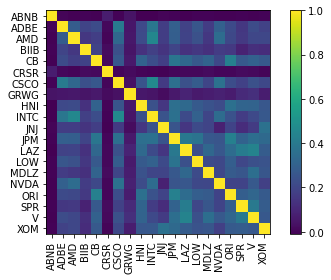

=== MARKET PRIOR ====
ABNB    0.020056
ADBE    0.115815
AMD     0.135390
BIIB    0.074473
CB      0.061758
CRSR    0.020385
CSCO    0.096892
GRWG    0.028120
HNI     0.074690
INTC    0.110907
JNJ     0.066894
JPM     0.106400
LAZ     0.059802
LOW     0.082819
MDLZ    0.040652
NVDA    0.116480
ORI     0.067252
SPR     0.055119
V       0.051582
XOM     0.066438
dtype: float64
==== VIEWDICT =====
{'ABNB': 0.1, 'V': 0.1, 'AMD': 0.1, 'CSCO': 0.1, 'HNI': 0.1}
==== INTERVALS =====
[(0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1)]
==== VARIANCES =====
[0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005]
==== OMEGA =====
[[0.0025 0.     0.     0.     0.    ]
 [0.     0.0025 0.     0.     0.    ]
 [0.     0.     0.0025 0.     0.    ]
 [0.     0.     0.     0.0025 0.    ]
 [0.     0.     0.     0.     0.0025]]
==== RET_BLACKLITTERMAN =====
ABNB    0.011641
ADBE    0.114900
AMD     0.107827
BIIB    0.070559
CB      0.061604
CRSR    0.

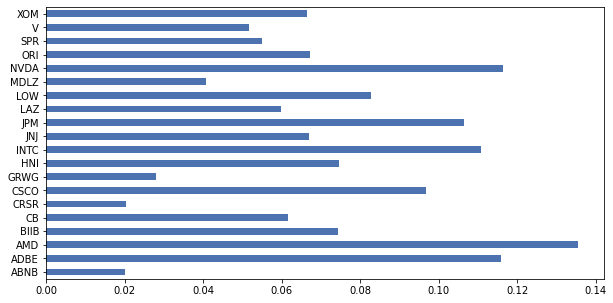

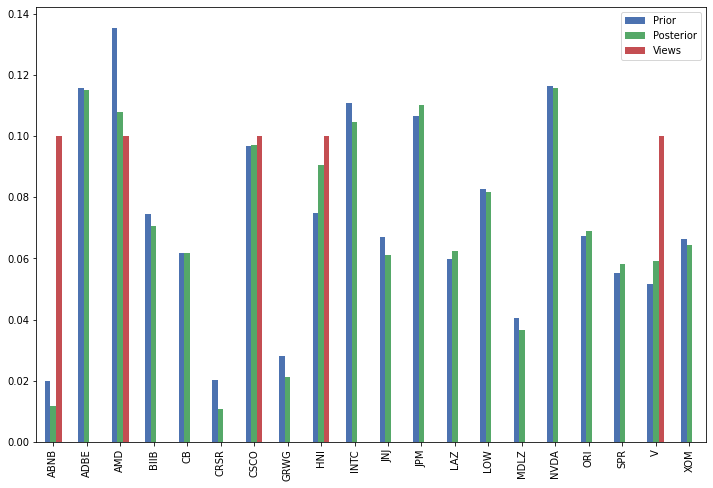

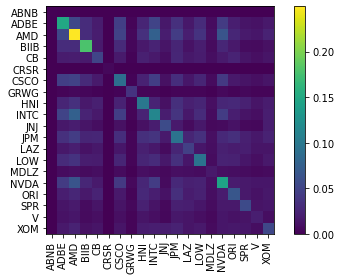

/home/rems/.local/share/virtualenvs/data-acc-ZSLQhKri/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Expected annual return: 6.5%
Annual volatility: 12.3%
Sharpe Ratio: 0.45
======================== Expected performance =================
annual return: 6.512%
annual volatility: 12.276%
sharpe ratio: 0.449
{'ABNB': 9, 'ADBE': 2, 'AMD': 7, 'BIIB': 3, 'CB': 6, 'CRSR': 36, 'CSCO': 19, 'GRWG': 31, 'HNI': 25, 'INTC': 16, 'JNJ': 7, 'JPM': 6, 'LAZ': 24, 'LOW': 5, 'MDLZ': 20, 'NVDA': 2, 'ORI': 49, 'SPR': 27, 'V': 5, 'XOM': 25}
Leftover: $0.23


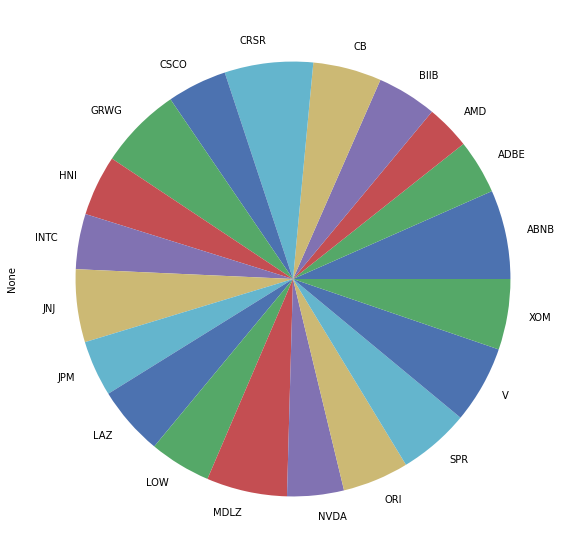

In [16]:
# Black-Litterman

from pypfopt import black_litterman, risk_models

"""
cov_matrix is a NxN sample covariance matrix
mcaps is a dict of market caps
market_prices is a series of S&P500 prices
"""

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

print("=== PRICES (df) ====")
print(df)

print("=== MCAPS ====")
print(mcaps)

S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
print("=== RISK MODEL ====")
print(S)
delta = black_litterman.market_implied_risk_aversion(market_prices) # Je trouve le Delta elevé
print("=== DELTA ====")
print(delta)
#delta = 2.5042720332949346

plotting.plot_covariance(S, plot_correlation=True);

"""
ANCIEN CALCUL FAIT CELLULE 1
print(tickers["bitcoin"]["market_cap"].iloc[-1])
#mcaps = {i:tickers[i].iloc[-1] for i in coins_list}

print("==== MCAPS =====")
print(mcaps)
### MCAPS == PRICE != MARKET_CAP
"""

market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
print("=== MARKET PRIOR ====")
print(market_prior)

market_prior.plot.barh(figsize=(10,5));
risk_free_rate = 0.01

# Contruction de la view pour estimer

# Relative View
"""Each view has a corresponding row in the picking matrix (the order matters)
Absolute views have a single 1 in the column corresponding to the ticker’s order in the universe.
Relative views have a positive number in the nominally outperforming asset columns and a negative number in the nominally underperforming asset columns. 
The numbers in each row should sum up to 0."""

"""
Q = np.array([-0.20, 0.05, 0.10, 0.15]).reshape(-1, 1) # Absolute
P = np.array( # Relative
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5, 0, 0],
    ]
)
# Absolute View
viewdict = {
    "bitcoin": 0.10,
    "ethereum": 0.30,
    "binancecoin": 0.05,
    "chainlink": 0.05,
    "eos": 0.20,
}

# Optionnal - Arbitrary confidences
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7
]
"""
#bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, view_confidences=confidences, omega="idzorek", tau=0.05)
# Optional - Standard deviation confidences
# Absolute View
"""
viewdict = {
    "ABNB": 0.10, 
    "V": 0.10, 
    "AMD": 0.10, 
    "CSCO": 0.10,
    "HNI": 0.10, 
    "ORI": 0.10, 
    "SPR": 0.10, 
    "XOM": 0.10, 
    "CB": 0.10, 
    "LOW": 0.10, 
    "MDLZ": 0.10, 
    "GRWG": 0.10, 
    "BIIB": 0.10, 
    "NVDA": 0.10, 
    "ADBE": 0.10, 
    "CRSR": 0.10, 
    "INTC": 0.10, 
    "JNJ": 0.10, 
    "JPM": 0.10, 
    "LAZ": 0.10, 
}
"""
viewdict = {}
intervals = []
double_list = (
    [{"ABNB": 0.10}, (0, 0.1)],
    [{"V": 0.10}, (0, 0.1)],
    [{"AMD": 0.10}, (0, 0.1)],
    [{"CSCO": 0.10}, (0, 0.1)],
    [{"HNI": 0.10}, (0, 0.1)],
)
for el in double_list:
    viewdict.update(el[0])
    intervals.append(el[1])
"""    
viewdict = {
    "ABNB": 0.10, 
    "V": 0.10, 
    "AMD": 0.10, 
    "CSCO": 0.10,
    "HNI": 0.10, 
}
"""
"""
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
]
"""
"""
intervals = [
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
]
"""

print("==== VIEWDICT =====")
print(viewdict)
print("==== INTERVALS =====")
print(intervals)


variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)
    
print("==== VARIANCES =====")
print(variances)
omega = np.diag(variances)

print("==== OMEGA =====")
print(omega)

# We are using the shortcut to automatically compute market-implied prior
# pi = market_prior
bl = BlackLittermanModel(
    cov_matrix=S, 
    pi="market", 
    absolute_views=viewdict,
    market_caps=mcaps, 
    risk_aversion=delta, 
    omega=omega, 
    tau=0.05, 
    risk_free_rate=risk_free_rate
)
# args de BlackLittermanModel (cov_matrix, pi=None, absolute_views=None, Q=None, P=None, omega=None, view_confidences=None, tau=0.05, risk_aversion=1)
"""
#fig, ax = plt.subplots(figsize=(7,7))
#im = ax.imshow(bl.omega)

# We want to show all ticks...
#ax.set_xticks(np.arange(len(bl.tickers)))
#ax.set_yticks(np.arange(len(bl.tickers)))

#ax.set_xticklabels(bl.tickers)
#ax.set_yticklabels(bl.tickers)
#plt.show()
#np.diag(bl.omega)
"""

# Posterior estimate of returns
ret_bl = bl.bl_returns()
print("==== RET_BLACKLITTERMAN =====")
print(ret_bl)
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T


rets_df.plot.bar(figsize=(12,8));

# Posterior covariance estimate
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);


### PORTFOLIO ALLOCATION

from pypfopt import EfficientFrontier, objective_functions
gamma = 1
broker_fees = 0.001


initial_weights = np.array([
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=broker_fees) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

#ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
ef.min_volatility()
#bl.bl_weights(delta)
weights = ef.clean_weights()


pd.Series(weights).plot.pie(figsize=(10,10));


from pypfopt import DiscreteAllocation

capital = 19500
portfolio_performance = ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)
expected_annual_return = portfolio_performance[0]
expected_annual_volatility = portfolio_performance[1]
expected_sharpe_ratio = portfolio_performance[2]
print("======================== Expected performance =================")
print(f"annual return: {expected_annual_return:.3%}")
print(f"annual volatility: {expected_annual_volatility:.3%}")
print(f"sharpe ratio: {expected_sharpe_ratio:.3}")

da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
alloc, leftover = da.lp_portfolio()

print(alloc)
print(f"Leftover: ${leftover:.2f}")

=== PRICES (df) ====
                  ABNB        ADBE        AMD        BIIB          CB  \
Date                                                                    
1962-01-02         NaN         NaN        NaN         NaN         NaN   
1962-01-03         NaN         NaN        NaN         NaN         NaN   
1962-01-04         NaN         NaN        NaN         NaN         NaN   
1962-01-05         NaN         NaN        NaN         NaN         NaN   
1962-01-08         NaN         NaN        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2020-12-22  163.190002  504.170013  93.160004  247.869995  150.169998   
2020-12-23  158.009995  496.910004  91.550003  251.199997  151.059998   
2020-12-24  154.839996  499.859985  91.809998  248.889999  150.830002   
2020-12-28  149.000000  498.950012  91.599998  244.149994  151.880005   
2020-12-29  150.000000  502.109985  90.620003  243.460007  150.899994   

                 CRSR       C

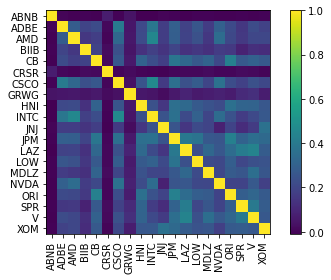

=== MARKET PRIOR ====
ABNB    0.020056
ADBE    0.115815
AMD     0.135390
BIIB    0.074473
CB      0.061758
CRSR    0.020385
CSCO    0.096892
GRWG    0.028120
HNI     0.074690
INTC    0.110907
JNJ     0.066894
JPM     0.106400
LAZ     0.059802
LOW     0.082819
MDLZ    0.040652
NVDA    0.116480
ORI     0.067252
SPR     0.055119
V       0.051582
XOM     0.066438
dtype: float64
==== VIEWDICT =====
{'ABNB': 0.1, 'V': 0.1, 'AMD': 0.1, 'CSCO': 0.1, 'HNI': 0.1}
==== INTERVALS =====
[(0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1)]
==== VARIANCES =====
[0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005]
==== OMEGA =====
[[0.0025 0.     0.     0.     0.    ]
 [0.     0.0025 0.     0.     0.    ]
 [0.     0.     0.0025 0.     0.    ]
 [0.     0.     0.     0.0025 0.    ]
 [0.     0.     0.     0.     0.0025]]
==== RET_BLACKLITTERMAN =====
ABNB    0.011641
ADBE    0.114900
AMD     0.107827
BIIB    0.070559
CB      0.061604
CRSR    0.

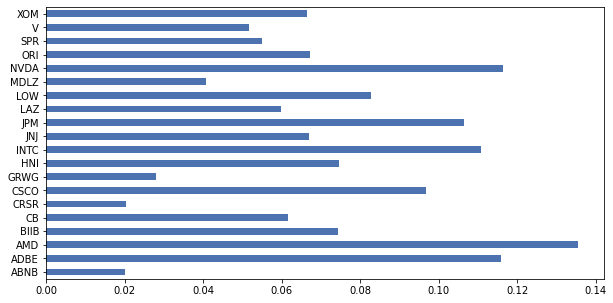

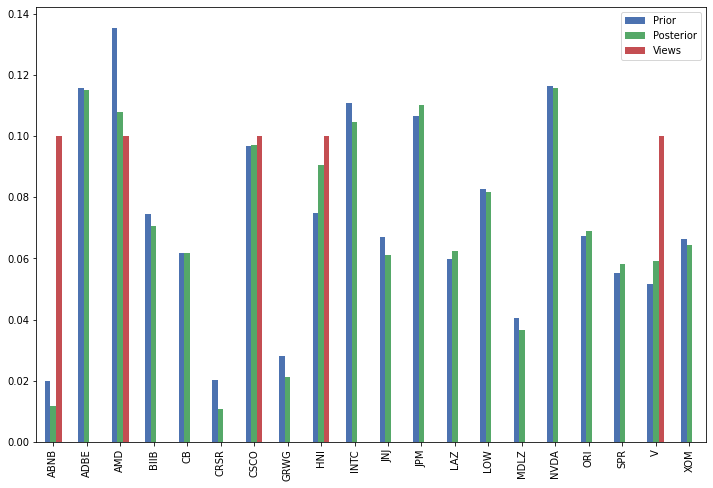

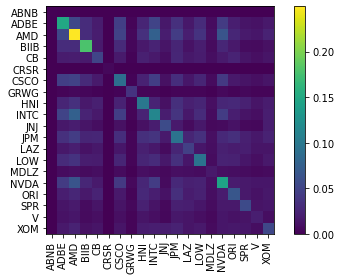

======== B ========
[0.64]
Expected annual return: 6.3%
Annual volatility: 11.7%
Sharpe Ratio: 0.45
======================== Expected performance =================
annual return: 6.272%
annual volatility: 11.734%
sharpe ratio: 0.449
{'ABNB': 10, 'ADBE': 1, 'AMD': 6, 'BIIB': 3, 'CB': 7, 'CRSR': 40, 'CSCO': 18, 'GRWG': 34, 'HNI': 24, 'INTC': 15, 'JNJ': 7, 'JPM': 6, 'LAZ': 24, 'LOW': 5, 'MDLZ': 22, 'NVDA': 2, 'ORI': 49, 'SPR': 28, 'V': 5, 'XOM': 25}
Leftover: $8.62


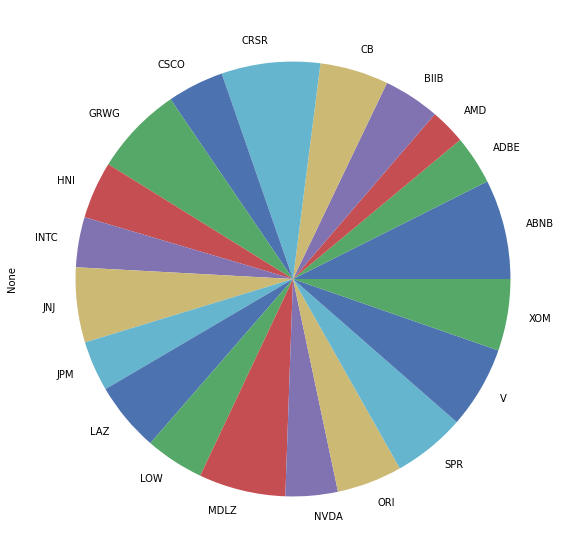

In [39]:
# Black-Litterman

from pypfopt import black_litterman, risk_models

"""
cov_matrix is a NxN sample covariance matrix
mcaps is a dict of market caps
market_prices is a series of S&P500 prices
"""

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

print("=== PRICES (df) ====")
print(df)

print("=== MCAPS ====")
print(mcaps)

S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
print("=== RISK MODEL ====")
print(S)
delta = black_litterman.market_implied_risk_aversion(market_prices) # Je trouve le Delta elevé
print("=== DELTA ====")
print(delta)
#delta = 2.5042720332949346

plotting.plot_covariance(S, plot_correlation=True);

"""
ANCIEN CALCUL FAIT CELLULE 1
print(tickers["bitcoin"]["market_cap"].iloc[-1])
#mcaps = {i:tickers[i].iloc[-1] for i in coins_list}

print("==== MCAPS =====")
print(mcaps)
### MCAPS == PRICE != MARKET_CAP
"""

market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
print("=== MARKET PRIOR ====")
print(market_prior)

market_prior.plot.barh(figsize=(10,5));
risk_free_rate = 0.01
broker_fees = 0.001
initial_weights = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])
# Contruction de la view pour estimer

# Relative View
"""Each view has a corresponding row in the picking matrix (the order matters)
Absolute views have a single 1 in the column corresponding to the ticker’s order in the universe.
Relative views have a positive number in the nominally outperforming asset columns and a negative number in the nominally underperforming asset columns. 
The numbers in each row should sum up to 0."""

"""
Q = np.array([-0.20, 0.05, 0.10, 0.15]).reshape(-1, 1) # Absolute
P = np.array( # Relative
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5, 0, 0],
    ]
)
# Absolute View
viewdict = {
    "bitcoin": 0.10,
    "ethereum": 0.30,
    "binancecoin": 0.05,
    "chainlink": 0.05,
    "eos": 0.20,
}

# Optionnal - Arbitrary confidences
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7
]
"""
#bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, view_confidences=confidences, omega="idzorek", tau=0.05)
# Optional - Standard deviation confidences
# Absolute View
"""
viewdict = {
    "ABNB": 0.10, 
    "V": 0.10, 
    "AMD": 0.10, 
    "CSCO": 0.10,
    "HNI": 0.10, 
    "ORI": 0.10, 
    "SPR": 0.10, 
    "XOM": 0.10, 
    "CB": 0.10, 
    "LOW": 0.10, 
    "MDLZ": 0.10, 
    "GRWG": 0.10, 
    "BIIB": 0.10, 
    "NVDA": 0.10, 
    "ADBE": 0.10, 
    "CRSR": 0.10, 
    "INTC": 0.10, 
    "JNJ": 0.10, 
    "JPM": 0.10, 
    "LAZ": 0.10, 
}
"""
viewdict = {}
intervals = []
double_list = (
    [{"ABNB": 0.10}, (0, 0.1)],
    [{"V": 0.10}, (0, 0.1)],
    [{"AMD": 0.10}, (0, 0.1)],
    [{"CSCO": 0.10}, (0, 0.1)],
    [{"HNI": 0.10}, (0, 0.1)],
)
for el in double_list:
    viewdict.update(el[0])
    intervals.append(el[1])
"""    
viewdict = {
    "ABNB": 0.10, 
    "V": 0.10, 
    "AMD": 0.10, 
    "CSCO": 0.10,
    "HNI": 0.10, 
}
"""
"""
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
]
"""
"""
intervals = [
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
    (0, 0.1),
]
"""

print("==== VIEWDICT =====")
print(viewdict)
print("==== INTERVALS =====")
print(intervals)


variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)
    
print("==== VARIANCES =====")
print(variances)
omega = np.diag(variances)

print("==== OMEGA =====")
print(omega)

# We are using the shortcut to automatically compute market-implied prior
# pi = market_prior
bl = BlackLittermanModel(
    cov_matrix=S, 
    pi="market", 
    absolute_views=viewdict,
    market_caps=mcaps, 
    risk_aversion=delta, 
    omega=omega, 
    tau=0.05, 
    risk_free_rate=risk_free_rate
)
# args de BlackLittermanModel (cov_matrix, pi=None, absolute_views=None, Q=None, P=None, omega=None, view_confidences=None, tau=0.05, risk_aversion=1)
"""
#fig, ax = plt.subplots(figsize=(7,7))
#im = ax.imshow(bl.omega)

# We want to show all ticks...
#ax.set_xticks(np.arange(len(bl.tickers)))
#ax.set_yticks(np.arange(len(bl.tickers)))

#ax.set_xticklabels(bl.tickers)
#ax.set_yticklabels(bl.tickers)
#plt.show()
#np.diag(bl.omega)
"""

# Posterior estimate of returns
ret_bl = bl.bl_returns()
print("==== RET_BLACKLITTERMAN =====")
print(ret_bl)
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T


rets_df.plot.bar(figsize=(12,8));

# Posterior covariance estimate
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);


### PORTFOLIO ALLOCATION
test = {}

from pypfopt import EfficientFrontier, objective_functions
for i in np.arange(0, 1, 0.01):
    gamma = i



    initial_weights = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
    ])

    ef = EfficientFrontier(ret_bl, S_bl)
    ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=broker_fees) # 0.1% broker commission
    ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

    #ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
    ef.min_volatility()
    #bl.bl_weights(delta)
    weights = ef.clean_weights()


    from pypfopt import DiscreteAllocation

    capital = 19500
    portfolio_performance = ef.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)
    expected_annual_return = portfolio_performance[0]
    expected_annual_volatility = portfolio_performance[1]
    expected_sharpe_ratio = portfolio_performance[2]
    """print("======================== Expected performance =================")
    print(f"annual return: {expected_annual_return:.3%}")
    print(f"annual volatility: {expected_annual_volatility:.3%}")
    print(f"sharpe ratio: {expected_sharpe_ratio:.3}")"""

    da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
    alloc, leftover = da.lp_portfolio()

    #print(alloc)
    #print(f"Leftover: ${leftover:.2f}")
    test[gamma] = portfolio_performance[2]
#print(test)   
b = {k: v for k, v in sorted(test.items(), key=lambda item: item[1])}
print("======== B ========")
#print(b)
max_value = max(test.values())
max_keys = [k for k, v in test.items() if v == max_value] # getting all keys containing the `maximum`
print(max_keys)


gamma = max_keys[0]


initial_weights = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=broker_fees) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

#ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
ef.min_volatility()
#bl.bl_weights(delta)
weights = ef.clean_weights()

pd.Series(weights).plot.pie(figsize=(10,10), normalize=True);

from pypfopt import DiscreteAllocation

capital = 19500
portfolio_performance = ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)
expected_annual_return = portfolio_performance[0]
expected_annual_volatility = portfolio_performance[1]
expected_sharpe_ratio = portfolio_performance[2]
print("======================== Expected performance =================")
print(f"annual return: {expected_annual_return:.3%}")
print(f"annual volatility: {expected_annual_volatility:.3%}")
print(f"sharpe ratio: {expected_sharpe_ratio:.3}")

da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
alloc, leftover = da.lp_portfolio()

print(alloc)
print(f"Leftover: ${leftover:.2f}")

======== B ========
[0.01]
Expected annual return: 1134.8%
Annual volatility: 4.4%
Sharpe Ratio: 260.53
======================== Expected performance =================
annual return: 1134.788%
annual volatility: 4.352%
sharpe ratio: 2.61e+02
{'ABNB': 47, 'CRSR': 139, 'CSCO': 1, 'GRWG': 33, 'JNJ': 3, 'MDLZ': 44, 'ORI': 14, 'SPR': 11, 'V': 9, 'XOM': 13}
Leftover: $14.59
OrderedDict([('ABNB', 0.19526), ('ADBE', 0.00429), ('AMD', 0.0), ('BIIB', 0.01527), ('CB', 0.03401), ('CRSR', 0.17887), ('CSCO', 0.01821), ('GRWG', 0.09869), ('HNI', 0.00548), ('INTC', 0.0061), ('JNJ', 0.05387), ('JPM', 0.0), ('LAZ', 0.03185), ('LOW', 0.01476), ('MDLZ', 0.11681), ('NVDA', 0.01104), ('ORI', 0.03039), ('SPR', 0.04424), ('V', 0.0942), ('XOM', 0.04665)])
Expected annual return: 837.6%
Annual volatility: 6.8%
Sharpe Ratio: 123.40
Discrete allocation: {'ABNB': 26, 'BIIB': 1, 'CB': 5, 'CRSR': 98, 'CSCO': 8, 'GRWG': 50, 'HNI': 3, 'INTC': 3, 'JNJ': 7, 'LAZ': 15, 'LOW': 2, 'MDLZ': 39, 'ORI': 30, 'SPR': 23, 'V': 9, 

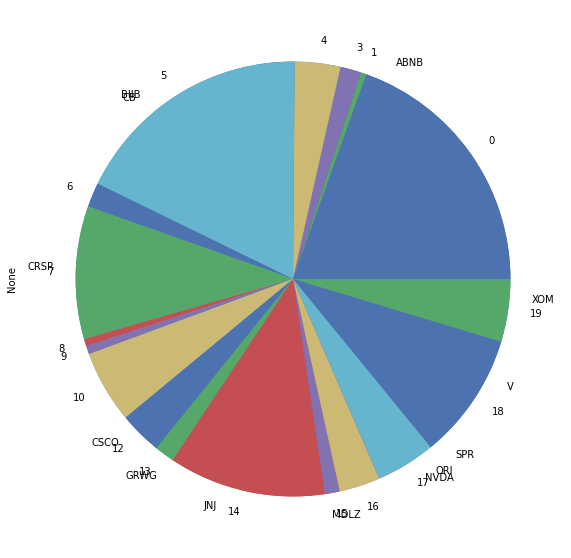

In [40]:
### NORMAL EMA/MEAN HISTORICAL VALUE
risk_free_rate = 0.01
broker_fees = 0.001
initial_weights = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])
#mu = expected_returns.mean_historical_return(df)
mu = expected_returns.ema_historical_return(df)
#mu = expected_returns.capm_return(df)
#mu = expected_returns.returns_from_prices(df)
#mu = expected_returns.prices_from_returns(df)

#S = risk_models.sample_cov(df)
#S = risk_models.semicovariance(df)
#S = risk_models.exp_cov(df)
#S = risk_models.min_cov_determinant(df)
#S = risk_models.CovarianceShrinkage(df.cov(min_periods=15))
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf')
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')
S = risk_models.risk_matrix(prices=df, method='oracle_approximating')

#mu.plot.barh(figsize=(10,5))
#plotting.plot_covariance(S, plot_correlation=True)

### PORTFOLIO ALLOCATION
test = {}

from pypfopt import EfficientFrontier, objective_functions
for i in np.arange(0, 1, 0.01):
    gamma = i

    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=gamma)
    ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=broker_fees) # 0.1% broker commission
    ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

    #ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
    ef.min_volatility()
    #bl.bl_weights(delta)
    weights = ef.clean_weights()


    from pypfopt import DiscreteAllocation

    capital = 19500
    portfolio_performance = ef.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)
    expected_annual_return = portfolio_performance[0]
    expected_annual_volatility = portfolio_performance[1]
    expected_sharpe_ratio = portfolio_performance[2]
    """print("======================== Expected performance =================")
    print(f"annual return: {expected_annual_return:.3%}")
    print(f"annual volatility: {expected_annual_volatility:.3%}")
    print(f"sharpe ratio: {expected_sharpe_ratio:.3}")"""

    da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
    alloc, leftover = da.lp_portfolio()

    #print(alloc)
    #print(f"Leftover: ${leftover:.2f}")
    test[gamma] = portfolio_performance[2]
#print(test)   
b = {k: v for k, v in sorted(test.items(), key=lambda item: item[1])}
print("======== B ========")
#print(b)
max_value = max(test.values())
max_keys = [k for k, v in test.items() if v == max_value] # getting all keys containing the `maximum`
print(max_keys)


gamma = max_keys[0]


initial_weights = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=gamma)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=broker_fees) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1


#ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
ef.min_volatility()
#bl.bl_weights(delta)
weights = ef.clean_weights()

pd.Series(weights).plot.pie(figsize=(10,10), normalize=True);

from pypfopt import DiscreteAllocation

capital = 19500
portfolio_performance = ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)
expected_annual_return = portfolio_performance[0]
expected_annual_volatility = portfolio_performance[1]
expected_sharpe_ratio = portfolio_performance[2]
print("======================== Expected performance =================")
print(f"annual return: {expected_annual_return:.3%}")
print(f"annual volatility: {expected_annual_volatility:.3%}")
print(f"sharpe ratio: {expected_sharpe_ratio:.3}")

da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
alloc, leftover = da.lp_portfolio()

print(alloc)
print(f"Leftover: ${leftover:.2f}")



gamma = 0.05

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=gamma)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

ef.min_volatility()
#ef.max_sharpe()
#ef.max_quadratic_utility()
#ef.min_efficient_risk(0.5)
#ef.min_efficient_return(0.5)


cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate=0.01) # 1% US Bond rate

pd.Series([abs(i) for i in cleaned_weights.values()]).plot.pie(figsize=(10,10), normalize=True)

capital = 19500
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=capital, short_ratio=0.3)

allocation, leftover = da.lp_portfolio()
#allocation, leftover = da.greedy_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

#pd.Series(cleaned_weights).plot.pie(figsize=(10,10))